In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

dataPath = 'C:/YONG/m1710/myPydata/'

def rjitt2(arr):
    stdev = .031*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def mnmx_scl2(vec):
    vec = np.where(np.percentile(vec, 95) < vec,
                   np.percentile(vec, 95), vec)
    vec = np.array(vec)
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

- 익숙한 하나의 라이브러리를 집중적으로 사용
- 많은 변수가 있다면 핵심 변수에 우선 집중
- 세 개의 변수를 한 Set으로 ( 그리고 3변수까지만, 그리고 No 3D Plot)

In [5]:
dff01 = pd.read_csv('https://t1.daumcdn.net/cfile/blog/992CFF3B5D5CC70C2C?download')

In [6]:
dff01.head()

,age,height,weight,amt_strbk,amt_book
0,28,157,52,22300,0
1,28,154,47,35100,0
2,28,155,52,21300,0
3,27,155,44,0,0
4,28,155,51,17500,0


In [7]:
print('Shape of the dataset : ', dff01.shape)

Shape of the dataset :  (5000, 5)


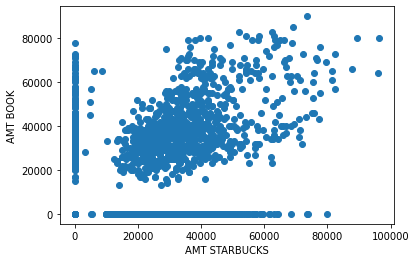

In [8]:
plt.scatter(dff01.amt_strbk, dff01.amt_book)
plt.xlabel('AMT STARBUCKS')
plt.ylabel('AMT BOOK')
plt.show()

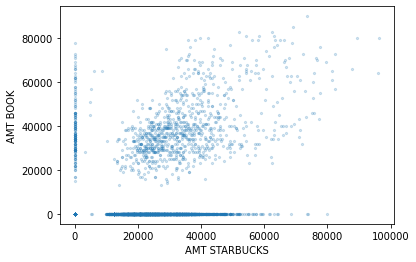

In [9]:
# alpha 투명도 옵션 활용

plt.scatter(dff01.amt_strbk, dff01.amt_book, s = 5, alpha = 0.2)
plt.xlabel('AMT STARBUCKS')
plt.ylabel('AMT BOOK')
plt.show()

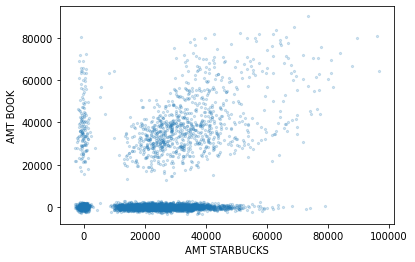

In [10]:

plt.scatter(rjitt(dff01.amt_strbk), rjitt(dff01.amt_book), s = 5, alpha = 0.2)
plt.xlabel('AMT STARBUCKS')
plt.ylabel('AMT BOOK')
plt.show()

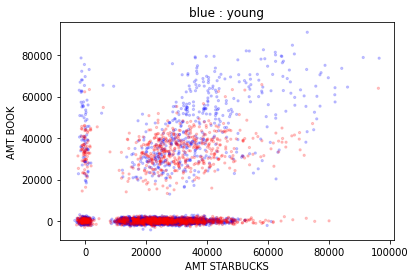

In [14]:
# target이 있다면 target 표시

median_age = dff01.age.median()
colors1 = ['red' if x > median_age else 'blue' for x in dff01.age]

plt.scatter(rjitt(dff01.amt_strbk), rjitt(dff01.amt_book), s = 5, alpha = 0.2, color = colors1)
plt.xlabel('AMT STARBUCKS')
plt.ylabel('AMT BOOK')
plt.title('blue : young')
plt.show()

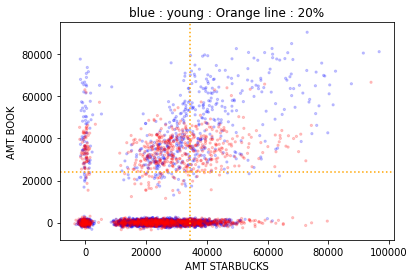

In [16]:
# 보조선은 시각적인 판단을 빠르게 하는데 크게 기여한다.

median_age = dff01.age.median()
colors1 = ['red' if x > median_age else 'blue' for x in dff01.age]

plt.scatter(rjitt(dff01.amt_strbk), rjitt(dff01.amt_book), s = 5, alpha = 0.2, color = colors1)
plt.xlabel('AMT STARBUCKS')
plt.ylabel('AMT BOOK')
plt.title('blue : young : Orange line : 20%')
plt.axvline(np.percentile(dff01.amt_strbk, 80),
            color = 'orange', linestyle = ':')
plt.axhline(np.percentile(dff01.amt_book, 80), 
            color = 'orange', linestyle = ':')
plt.show()

**Finding**

- 서적 구매가 전혀 없는 고객들 다수
- 스타벅스 구매는 대부분의 고객들이 약간이라도 있음
- 젊은 여성쪽에서 스타벅스와 서적 모두의 구매금액이 큰 경우가 많음
- 스타벅스와 서적 모두 구매한 집단에서는 두 품목간 양의 상관관계 존재하는듯

## 많은 변수가 있다면 핵심변수에 집중(ex) Target있는 경우)

- 변수가 여러개라면 DT나 RF, CatBoost로 변수 중요도를 구한다
- RF를 사용하게 되면 Categorical Variable을 encoding하는 번거러움이 있으니 CatBoost가 편하다

variable importance :  {'height': 0.7231368284522289, 'weight': 0.0, 'amt_strbk': 0.07748767837764613, 'amt_book': 0.19937549317012487}


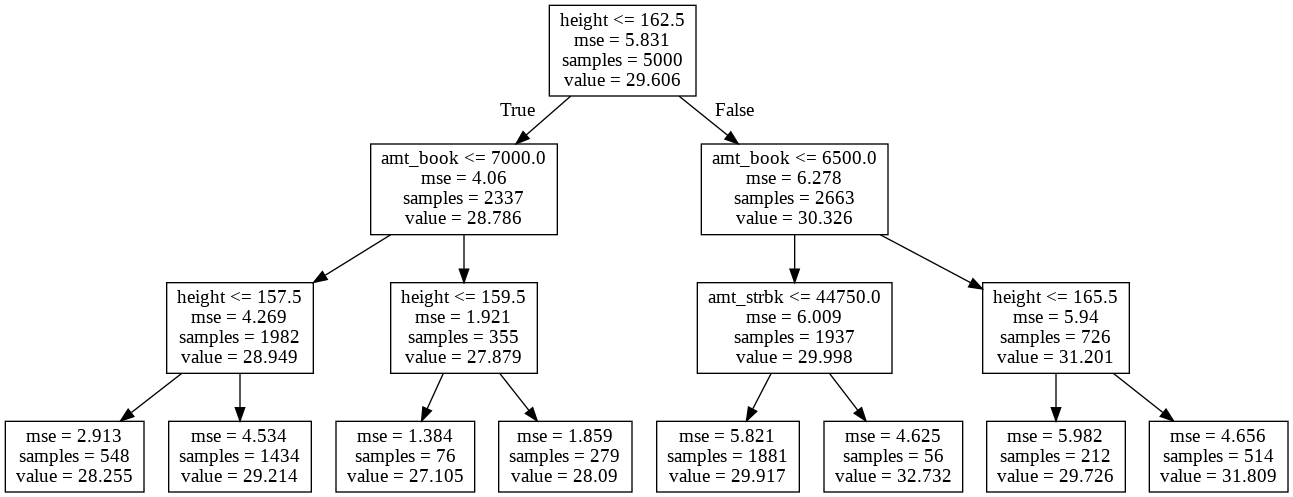

In [22]:
# searching for key variables using DT

from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=50, max_depth=3, min_samples_leaf=10, random_state=99)

dtfeatures = ['height','weight','amt_strbk','amt_book']
tgt = 'age'

dfdt = dff01

dt1.fit(dfdt[dtfeatures], dfdt[tgt])


# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


print('variable importance : ', dict(zip(dfdt[dtfeatures].columns, dt1.feature_importances_)))

# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

variable importance :  {'height': 0.6307171680650047, 'weight': 0.036030155469811656, 'amt_strbk': 0.10799550290753211, 'amt_book': 0.22525717355765157}


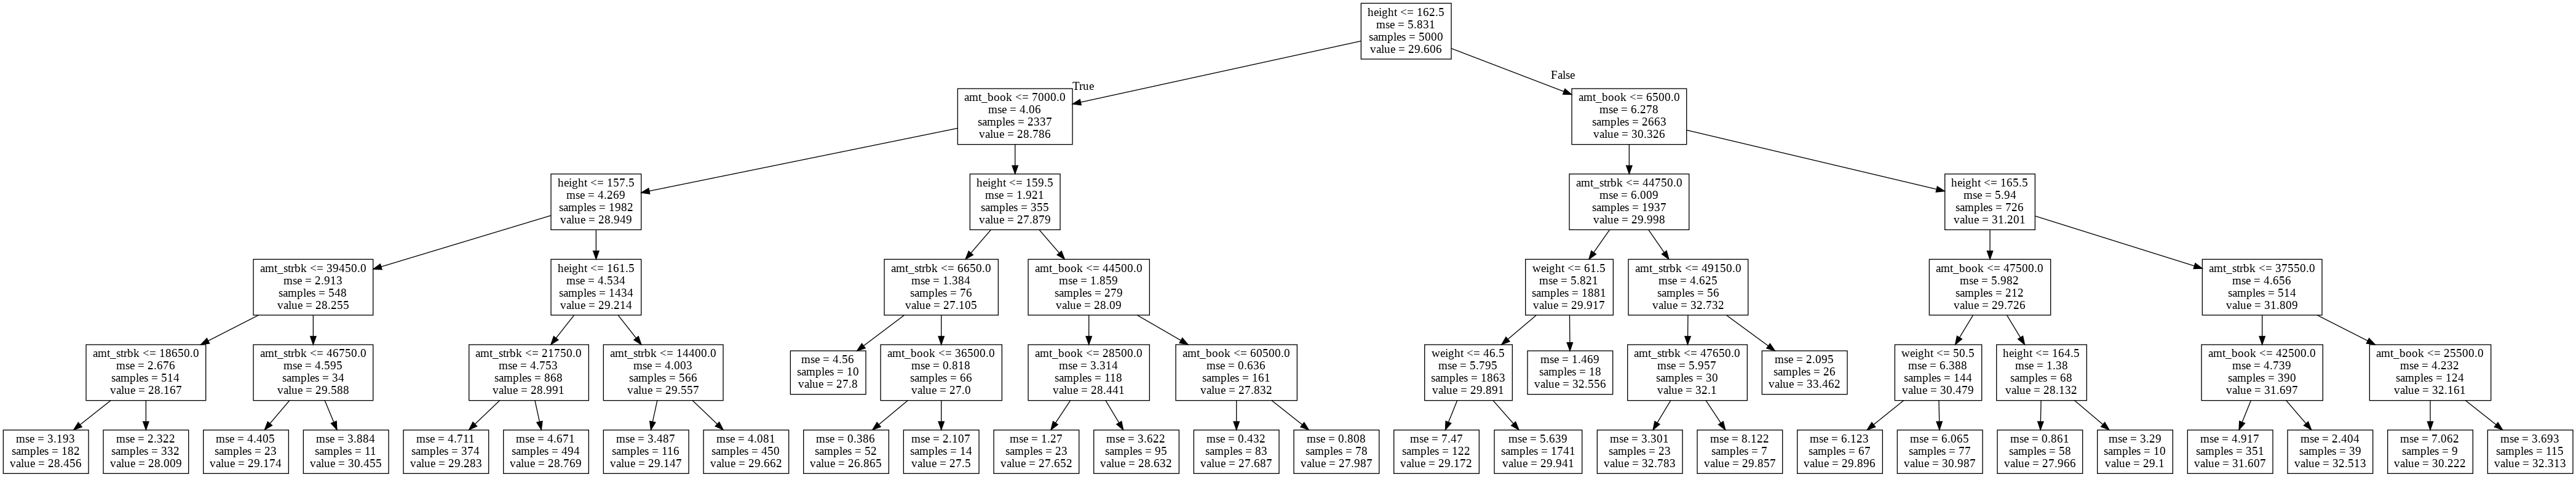

In [23]:
# searching for key variables
# A deeper and bush tree can show more info on Var Imp

from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, max_depth=5, 
                            min_samples_leaf=5, random_state=99)

dtfeatures = ['height','weight','amt_strbk','amt_book']
tgt = 'age'

dfdt = dff01

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


print('variable importance : ', dict(zip(dfdt[dtfeatures].columns, dt1.feature_importances_)))

# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

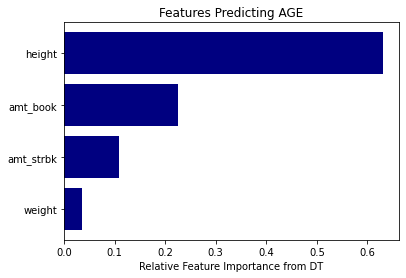

In [24]:
d = dict(zip(dfdt[dtfeatures].columns, dt1.feature_importances_))
d.items()
ddf = pd.DataFrame(pd.Series(d, name='Importance')).reset_index().sort_values('Importance')
ddf.columns = ['VarName', 'Importance']
ddf

plt.barh(ddf['VarName'], ddf['Importance'], color='navy')
plt.title('Features Predicting AGE')
plt.xlabel('Relative Feature Importance from DT')
plt.show()


👍 __CatBoost__는 여러개의 트리를 생성하기 때문에 보다 안정적인 (=믿음직스런) 결과를 준다

👍 CatBoost는 한 두개 핵심변수 이외의 변수들의 중요도도 나름 공평하게 인정해준다.
(핵심변수의 영향을 과대평가하는 것을 방지하는데 도움이 된다. 다만, 실행에 조금 더 많은 리소스가 필요하다)

In [27]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=300, depth=3, learning_rate=0.01,
                           eval_metric='R2', 
                           use_best_model=True,
                           random_seed=42)

train_x = dfdt[dtfeatures] 
tgt = 'age'
train_y = dfdt[tgt]

model.fit(
    train_x, train_y,
    # cat_features=categorical_features_indices,
    # verbose=True,  # you can uncomment this for text output
    # plot=True, # does not work for classifier
    eval_set=(train_x, train_y)    
)

0:	learn: 0.0028875	test: 0.0028875	best: 0.0028875 (0)	total: 47.4ms	remaining: 14.2s
1:	learn: 0.0059189	test: 0.0059189	best: 0.0059189 (1)	total: 49.1ms	remaining: 7.32s
2:	learn: 0.0081504	test: 0.0081504	best: 0.0081504 (2)	total: 50.3ms	remaining: 4.98s
3:	learn: 0.0106885	test: 0.0106885	best: 0.0106885 (3)	total: 51.4ms	remaining: 3.8s
4:	learn: 0.0136781	test: 0.0136781	best: 0.0136781 (4)	total: 52.5ms	remaining: 3.1s
5:	learn: 0.0164081	test: 0.0164081	best: 0.0164081 (5)	total: 53.5ms	remaining: 2.62s
6:	learn: 0.0188326	test: 0.0188326	best: 0.0188326 (6)	total: 54.6ms	remaining: 2.28s
7:	learn: 0.0214225	test: 0.0214225	best: 0.0214225 (7)	total: 55.6ms	remaining: 2.03s
8:	learn: 0.0242503	test: 0.0242503	best: 0.0242503 (8)	total: 56.7ms	remaining: 1.83s
9:	learn: 0.0266658	test: 0.0266658	best: 0.0266658 (9)	total: 57.7ms	remaining: 1.67s
10:	learn: 0.0289624	test: 0.0289624	best: 0.0289624 (10)	total: 58.8ms	remaining: 1.54s
11:	learn: 0.0313811	test: 0.0313811	best: 

<Figure size 432x288 with 0 Axes>

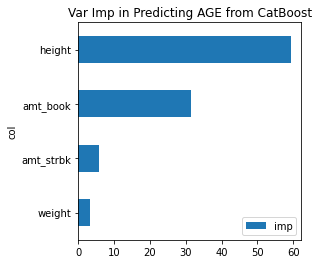

,imp,col,cum_sum_imp
0,59.25,height,59.25
3,31.45,amt_book,90.70
2,5.95,amt_strbk,96.65
1,3.36,weight,100.01
row_total,100.01,weightamt_strbkamt_bookheight,NaN


In [28]:
# Mapping Feature Importance

plt.figure()
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': train_x.columns})
fea_imp['imp'] = round(fea_imp.imp, 2)
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AGE from CatBoost')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

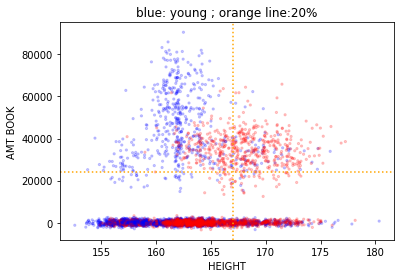

In [29]:
# 이제 핵심변수 두 가지를 중심으로 Scatter Plot을 그린다

# 일정한 규칙으로 X, Y 축을 정한다 (예: 중요도 1위 변수를 항상 X축에, 2등은 Y축에)

median_age = dff01.age.median()
colors1 = ['red' if x>median_age else 'blue' for x in dff01.age]

plt.scatter(rjitt(dff01.height), rjitt(dff01.amt_book), 
            s=5, alpha=0.2,
           color=colors1)
plt.xlabel('HEIGHT')
plt.ylabel('AMT BOOK')
plt.title('blue: young ; orange line:20%')
plt.axvline(np.percentile(dff01.height,80), 
            color='orange',linestyle=':')
plt.axhline(np.percentile(dff01.amt_book,80), 
            color='orange',linestyle=':')
plt.show()


## 세 개의 변수를 한 셋트로

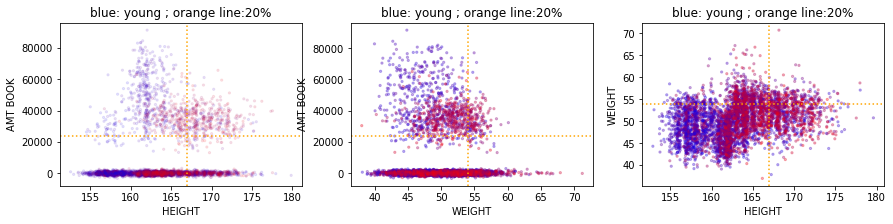

In [30]:
# 이 번에는 target인 age를 연속적으로 표시 (red~blue)
# scale age
rage = mnmx_scl(dff01.age)
colors1 = [(x, 0, 1-x) for x in rage]

plt.figure(figsize=(20, 3))
plt.subplot(141)
# 일정한 규칙으로 X, Y 축을 정한다 (예: 중요도 1위 변수를 항상 X축에, 2등은 Y축에)

# 첫번째 그림
plt.scatter(rjitt(dff01.height), rjitt(dff01.amt_book), 
            s=5, alpha=0.1,
           color=colors1)
plt.xlabel('HEIGHT')
plt.ylabel('AMT BOOK')
plt.title('blue: young ; orange line:20%')
plt.axvline(np.percentile(dff01.height,80), 
            color='orange',linestyle=':')
plt.axhline(np.percentile(dff01.amt_book,80), 
            color='orange',linestyle=':')

# 두번째 그림
plt.subplot(142)
plt.scatter(rjitt(dff01.weight), rjitt(dff01.amt_book), 
            s=5, alpha=0.3,
           color=colors1)
plt.xlabel('WEIGHT')
plt.ylabel('AMT BOOK')
plt.title('blue: young ; orange line:20%')
plt.axvline(np.percentile(dff01.weight,80), 
            color='orange',linestyle=':')
plt.axhline(np.percentile(dff01.amt_book,80), 
            color='orange',linestyle=':')

# 마지막 그림
plt.subplot(143)
plt.scatter(rjitt(dff01.height), rjitt(dff01.weight), 
            s=5, alpha=0.3,
           color=colors1)
plt.xlabel('HEIGHT')
plt.ylabel('WEIGHT')
plt.title('blue: young ; orange line:20%')
plt.axvline(np.percentile(dff01.height,80), 
            color='orange',linestyle=':')
plt.axhline(np.percentile(dff01.weight,80), 
            color='orange',linestyle=':')
plt.show()